In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para evitar warnings visuais:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# URL da base no Google Drive
url = 'https://drive.google.com/uc?id=1tiGUR4ZlKhB0WDH-x2Dy6_zfySIxrHeB'
df = pd.read_csv(url)

# Visualizar as primeiras linhas
print("Primeiras linhas do dataset:")
display(df.head())

Primeiras linhas do dataset:


,Gender,AgeGroup,AgeBand,Country,CountryISO2,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
0,M,40-44,40,Andorra,AD,2019,IRONMAN 70.3 South American Championship Bueno...,1679,119,9107,95,5515,16514
1,M,45-49,45,Andorra,AD,2019,IRONMAN 70.3 South American Championship Bueno...,2070,177,9160,132,6070,17609
2,M,45-49,45,Andorra,AD,2020,IRONMAN 70.3 Bariloche,1667,161,9891,122,5190,17031
3,M,45-49,45,Andorra,AD,2019,IRONMAN 70.3 World Championship,1750,183,10363,160,5071,17527
4,M,40-44,40,Andorra,AD,2019,IRONMAN 70.3 World Championship,2063,182,10065,142,5556,18008


In [3]:
print("\nColunas disponíveis na base:")
print(df.columns.tolist())

print("\nTipos de dados de cada coluna:")
print(df.dtypes)

print("\nValores faltantes por coluna:")
print(df.isnull().sum())

print("\nQuantidade de registros na base:", len(df))


Colunas disponíveis na base:
['Gender', 'AgeGroup', 'AgeBand', 'Country', 'CountryISO2', 'EventYear', 'EventLocation', 'SwimTime', 'Transition1Time', 'BikeTime', 'Transition2Time', 'RunTime', 'FinishTime']

Tipos de dados de cada coluna:
Gender             object
AgeGroup           object
AgeBand             int64
Country            object
CountryISO2        object
EventYear           int64
EventLocation      object
SwimTime            int64
Transition1Time     int64
BikeTime            int64
Transition2Time     int64
RunTime             int64
FinishTime          int64
dtype: object

Valores faltantes por coluna:
Gender             0
AgeGroup           0
AgeBand            0
Country            0
CountryISO2        0
EventYear          0
EventLocation      0
SwimTime           0
Transition1Time    0
BikeTime           0
Transition2Time    0
RunTime            0
FinishTime         0
dtype: int64

Quantidade de registros na base: 840075


In [4]:
# Filtrar apenas atletas do gênero masculino (caso queira manter comparabilidade)
df = df[df['Gender'] == 'M'].copy()

# Checar as categorias de AgeGroup
print("\nCategorias disponíveis em AgeGroup:")
print(df['AgeGroup'].unique())
print("\nValores únicos em AgeBand:", df['AgeBand'].unique())

# Cálculo do limite de competitividade (20% menores FinishTime = Competitivo)
limite_competitivo = df['FinishTime'].quantile(0.2)
df['Performance'] = np.where(df['FinishTime'] <= limite_competitivo, 'Competitivo', 'Apenas Concluinte')
df['Performance_label'] = df['Performance'].map({'Apenas Concluinte': 0, 'Competitivo': 1})

print("\nDistribuição de Performance:")
print(df['Performance'].value_counts())


Categorias disponíveis em AgeGroup:
['40-44' '45-49' '35-39' '50-54' '25-29' '18-24' '30-34' '55-59' '00'
 '60-64' '70-74' '65-69' '75-79' '80-84' '85-89']

Valores únicos em AgeBand: [40 45 35 50 25 18 30 55  0 60 70 65 75 80 85]

Distribuição de Performance:
Performance
Apenas Concluinte    508497
Competitivo          127183
Name: count, dtype: int64


In [5]:
print(df[df['AgeGroup'] == '00'])
print(df[df['AgeBand'] == 0])

       Gender AgeGroup  AgeBand               Country CountryISO2  EventYear  \
424         M       00        0  United Arab Emirates          AE       2011   
477         M       00        0  United Arab Emirates          AE       2012   
802         M       00        0             Argentina          AR       2019   
803         M       00        0             Argentina          AR       2019   
835         M       00        0             Argentina          AR       2019   
...       ...      ...      ...                   ...         ...        ...   
838622      M       00        0          South Africa          ZA       2015   
839832      M       00        0          South Africa          ZA       2015   
839848      M       00        0          South Africa          ZA       2015   
839908      M       00        0          South Africa          ZA       2015   
839946      M       00        0          South Africa          ZA       2015   

                                       

In [6]:
df = df[(df['AgeGroup'] != '00') & (df['AgeBand'] != 0)].copy()

In [7]:
print(df['Performance'].value_counts())

Performance
Apenas Concluinte    508280
Competitivo          117118
Name: count, dtype: int64


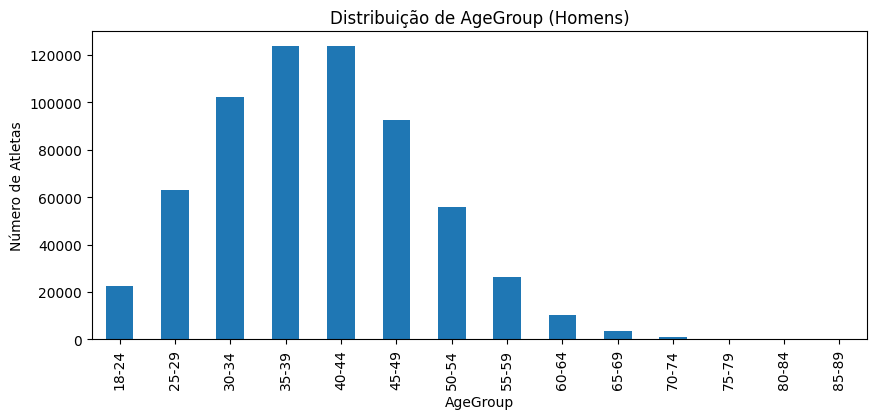

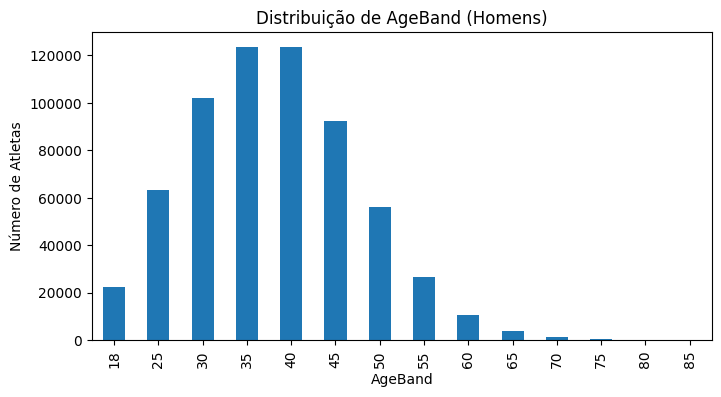

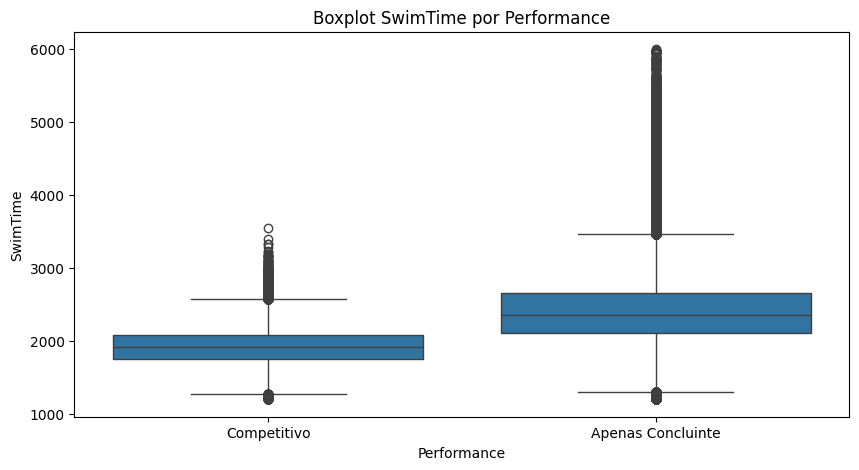

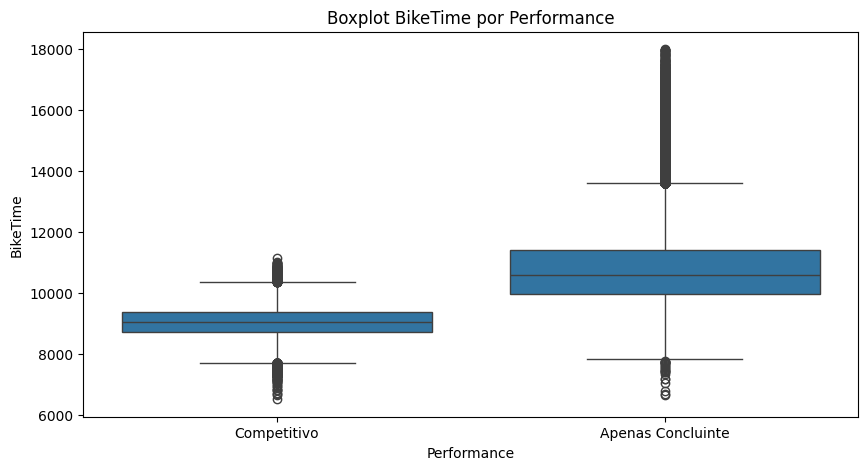

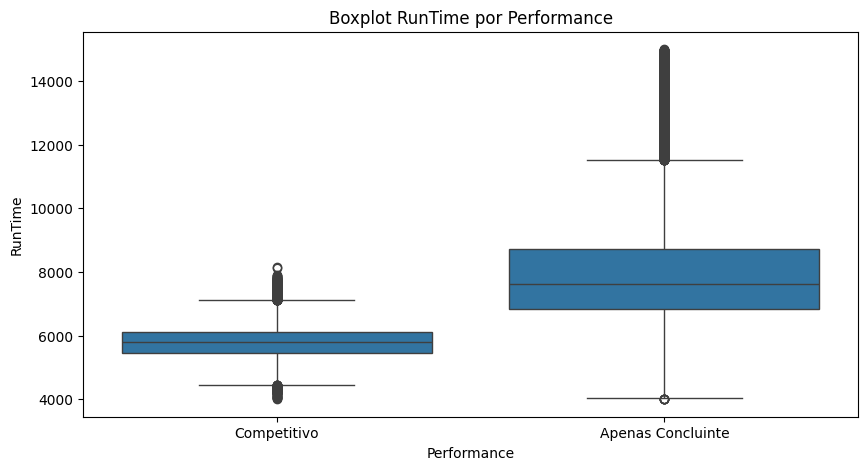

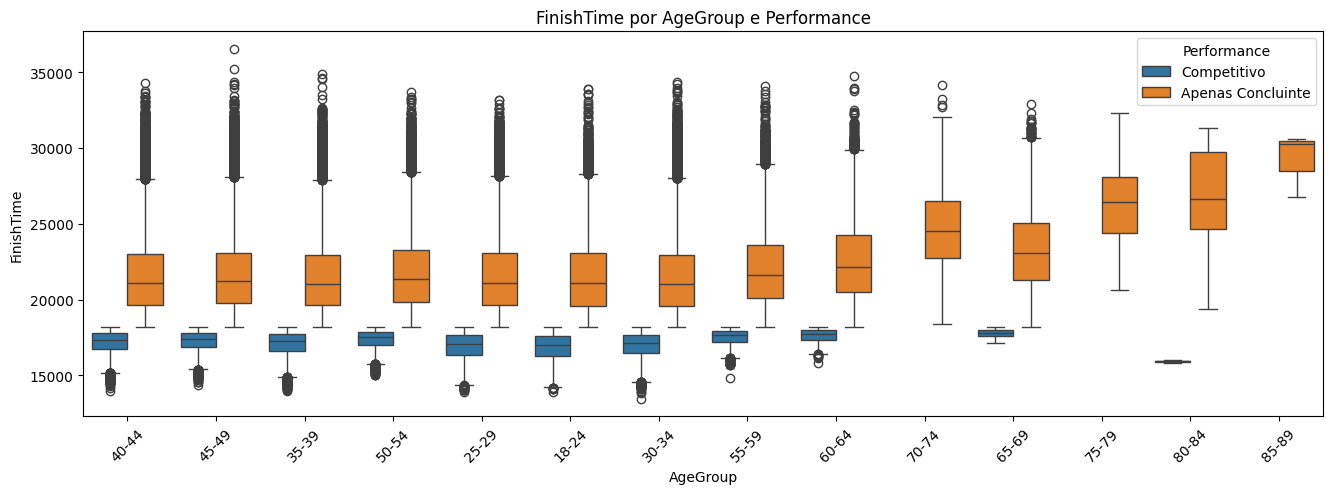

In [8]:
# Distribuição de AgeGroup
plt.figure(figsize=(10,4))
df['AgeGroup'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de AgeGroup (Homens)')
plt.xlabel('AgeGroup')
plt.ylabel('Número de Atletas')
plt.show()

# Distribuição de AgeBand
plt.figure(figsize=(8,4))
df['AgeBand'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de AgeBand (Homens)')
plt.xlabel('AgeBand')
plt.ylabel('Número de Atletas')
plt.show()

# Boxplot dos tempos por performance
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Performance', y='SwimTime')
plt.title('Boxplot SwimTime por Performance')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Performance', y='BikeTime')
plt.title('Boxplot BikeTime por Performance')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Performance', y='RunTime')
plt.title('Boxplot RunTime por Performance')
plt.show()

# Boxplot dos tempos por AgeGroup (opcional)
plt.figure(figsize=(16,5))
sns.boxplot(data=df, x='AgeGroup', y='FinishTime', hue='Performance')
plt.title('FinishTime por AgeGroup e Performance')
plt.xticks(rotation=45)
plt.show()

   AgeGroup        Performance   count          mean   median          std
0     18-24  Apenas Concluinte   16358  21607.703692  21057.5  2554.833680
1     18-24        Competitivo    6126  16876.761998  16988.0   874.917390
2     25-29  Apenas Concluinte   47507  21602.010525  21100.0  2510.549163
3     25-29        Competitivo   15586  16921.066534  17049.0   858.470082
4     30-34  Apenas Concluinte   78241  21536.394704  21032.0  2473.273720
5     30-34        Competitivo   23886  17006.384577  17148.5   820.420818
6     35-39  Apenas Concluinte   97648  21542.711996  21047.0  2456.919219
7     35-39        Competitivo   26081  17104.218780  17252.0   779.758138
8     40-44  Apenas Concluinte  101501  21579.332775  21094.0  2456.928695
9     40-44        Competitivo   22158  17200.619189  17346.0   720.810642
10    45-49  Apenas Concluinte   78351  21658.260048  21189.0  2465.729036
11    45-49        Competitivo   14172  17281.438541  17412.0   663.809220
12    50-54  Apenas Concl

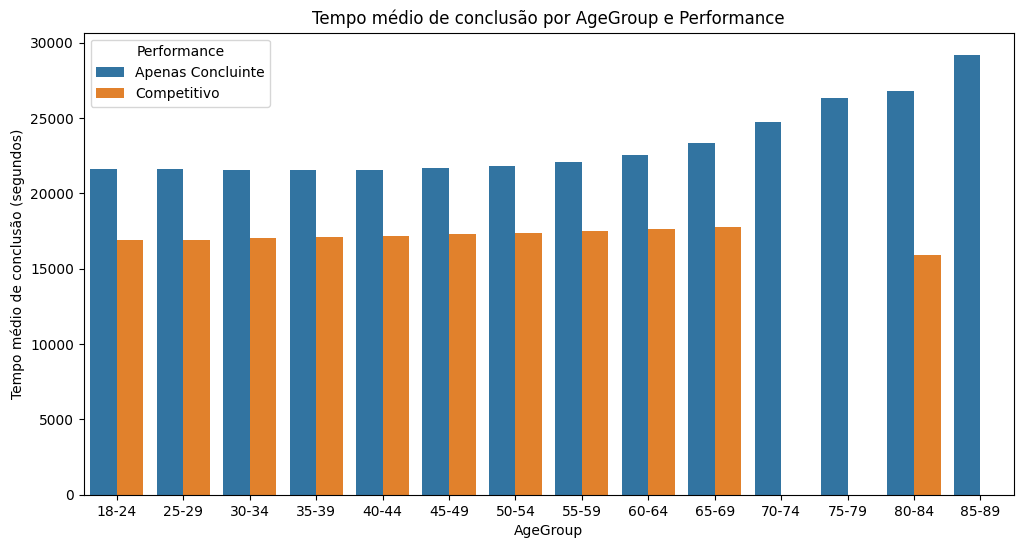

In [9]:
# Estatísticas por AgeGroup e Performance
group_stats = df.groupby(['AgeGroup', 'Performance'])['FinishTime'].agg(['count','mean','median','std']).reset_index()
print(group_stats)

# Exibir as principais faixas em tabela
plt.figure(figsize=(12,6))
sns.barplot(data=group_stats, x='AgeGroup', y='mean', hue='Performance')
plt.ylabel('Tempo médio de conclusão (segundos)')
plt.title('Tempo médio de conclusão por AgeGroup e Performance')
plt.show()

Correlação entre idade (AgeBand) e FinishTime: 0.144


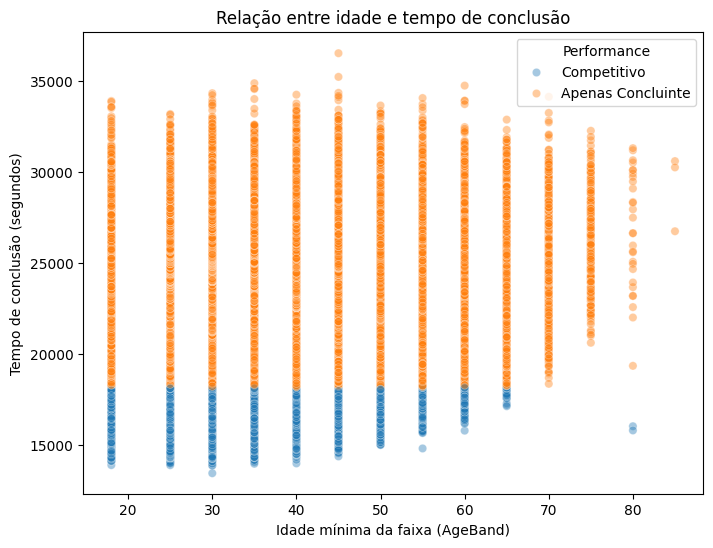

In [10]:
# Correlação
cor = df['AgeBand'].corr(df['FinishTime'])
print(f"Correlação entre idade (AgeBand) e FinishTime: {cor:.3f}")

# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='AgeBand', y='FinishTime', hue='Performance', alpha=0.4)
plt.title('Relação entre idade e tempo de conclusão')
plt.xlabel('Idade mínima da faixa (AgeBand)')
plt.ylabel('Tempo de conclusão (segundos)')
plt.show()

   AgeGroup   total  competitivos  proporcao_competitivos
0     18-24   22484        6126.0                0.272460
1     25-29   63093       15586.0                0.247032
2     30-34  102127       23886.0                0.233885
3     35-39  123729       26081.0                0.210791
4     40-44  123659       22158.0                0.179186
5     45-49   92523       14172.0                0.153173
6     50-54   55880        6712.0                0.120115
7     55-59   26448        2024.0                0.076528
8     60-64   10332         347.0                0.033585
9     65-69    3730          24.0                0.006434
10    70-74    1146           0.0                0.000000
11    75-79     213           0.0                0.000000
12    80-84      31           2.0                0.064516
13    85-89       3           0.0                0.000000


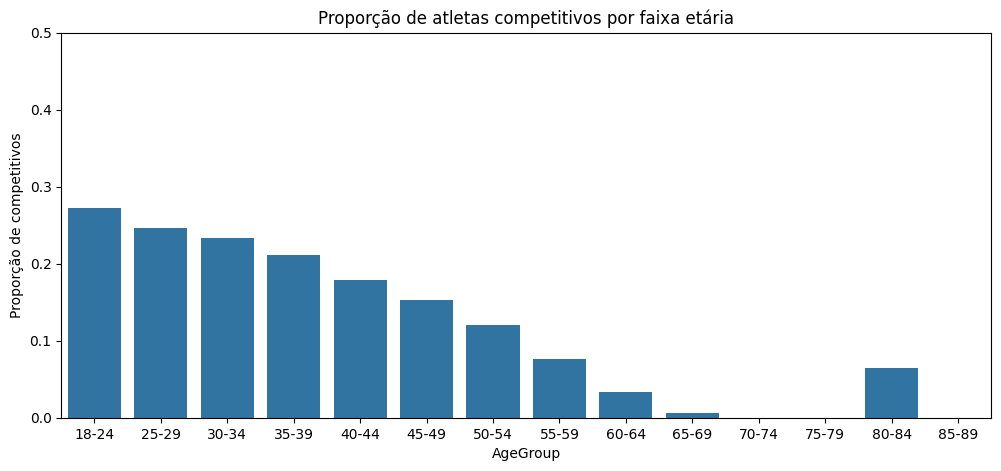

In [11]:
# Calcular o total de atletas por AgeGroup
total_por_agegroup = df.groupby('AgeGroup')['Performance'].count().reset_index(name='total')

# Calcular o total de competitivos por AgeGroup
competitivos_por_agegroup = df[df['Performance'] == 'Competitivo'].groupby('AgeGroup')['Performance'].count().reset_index(name='competitivos')

# Unir as duas tabelas
proporcao = pd.merge(total_por_agegroup, competitivos_por_agegroup, on='AgeGroup', how='left')
proporcao['competitivos'] = proporcao['competitivos'].fillna(0)
proporcao['proporcao_competitivos'] = proporcao['competitivos'] / proporcao['total']

# Ordenar AgeGroup por faixa etária crescente
from natsort import natsorted
proporcao = proporcao.set_index('AgeGroup').loc[natsorted(proporcao['AgeGroup'])].reset_index()

print(proporcao[['AgeGroup', 'total', 'competitivos', 'proporcao_competitivos']])

# Visualizar graficamente
plt.figure(figsize=(12,5))
sns.barplot(data=proporcao, x='AgeGroup', y='proporcao_competitivos')
plt.ylabel('Proporção de competitivos')
plt.xlabel('AgeGroup')
plt.title('Proporção de atletas competitivos por faixa etária')
plt.ylim(0, 0.5)
plt.show()

In [12]:
df_80_84 = df[df['AgeGroup'] == '80-84']
print(df_80_84[['AgeGroup', 'Performance', 'FinishTime', 'SwimTime', 'BikeTime', 'RunTime']])

       AgeGroup        Performance  FinishTime  SwimTime  BikeTime  RunTime
22332     80-84        Competitivo       16031      2377      8554     4760
22495     80-84  Apenas Concluinte       19350      2394      9320     6944
22589     80-84        Competitivo       15802      1828      8623     4959
32875     80-84  Apenas Concluinte       27951      2379     13255    11692
363420    80-84  Apenas Concluinte       30519      2996     13989    12686
423604    80-84  Apenas Concluinte       25963      2954     13049     9355
459940    80-84  Apenas Concluinte       28351      3212     12937    11479
561524    80-84  Apenas Concluinte       30105      3121     12779    13233
580426    80-84  Apenas Concluinte       31195      2775     15052    12777
597808    80-84  Apenas Concluinte       30648      3421     13791    12869
618343    80-84  Apenas Concluinte       25069      2765     12340     9356
652535    80-84  Apenas Concluinte       29920      2893     14757    11391
653573    80

In [13]:
df_80_84_comp = df_80_84[df_80_84['Performance'] == 'Competitivo']
print(df_80_84_comp)

      Gender AgeGroup  AgeBand  Country CountryISO2  EventYear  \
22332      M    80-84       80  Austria          AT       2010   
22589      M    80-84       80  Austria          AT       2010   

                           EventLocation  SwimTime  Transition1Time  BikeTime  \
22332  IRONMAN 70.3 Austria / St. Polten      2377              231      8554   
22589  IRONMAN 70.3 Austria / St. Polten      1828              257      8623   

       Transition2Time  RunTime  FinishTime  Performance  Performance_label  
22332              109     4760       16031  Competitivo                  1  
22589              135     4959       15802  Competitivo                  1  


In [14]:
def segundos_para_hms(segundos):
    horas = int(segundos // 3600)
    minutos = int((segundos % 3600) // 60)
    segundos_restantes = int(segundos % 60)
    return f"{horas:02d}:{minutos:02d}:{segundos_restantes:02d}"

In [15]:
# Filtrar apenas atletas competitivos
df_comp = df[df['Performance'] == 'Competitivo']

# Calcular média e mediana do FinishTime por faixa etária competitiva
estatisticas_comp = df_comp.groupby('AgeGroup')['FinishTime'].agg(['count', 'mean', 'median', 'std']).reset_index()

# Converter segundos para hh:mm:ss (opcional, para melhor leitura)
estatisticas_comp['mean_hms'] = estatisticas_comp['mean'].apply(segundos_para_hms)
estatisticas_comp['median_hms'] = estatisticas_comp['median'].apply(segundos_para_hms)

print(estatisticas_comp[['AgeGroup', 'count', 'mean_hms', 'median_hms', 'std']])

   AgeGroup  count  mean_hms median_hms         std
0     18-24   6126  04:41:16   04:43:08  874.917390
1     25-29  15586  04:42:01   04:44:09  858.470082
2     30-34  23886  04:43:26   04:45:48  820.420818
3     35-39  26081  04:45:04   04:47:32  779.758138
4     40-44  22158  04:46:40   04:49:06  720.810642
5     45-49  14172  04:48:01   04:50:12  663.809220
6     50-54   6712  04:49:47   04:52:00  597.646890
7     55-59   2024  04:52:03   04:53:59  506.015441
8     60-64    347  04:53:29   04:55:19  469.996607
9     65-69     24  04:56:23   04:56:58  294.226719
10    80-84      2  04:25:16   04:25:16  161.927453


In [16]:
print(df[(df['AgeGroup'].str.strip() == '80-84') & (df['Performance'].str.strip() == 'Competitivo')])

      Gender AgeGroup  AgeBand  Country CountryISO2  EventYear  \
22332      M    80-84       80  Austria          AT       2010   
22589      M    80-84       80  Austria          AT       2010   

                           EventLocation  SwimTime  Transition1Time  BikeTime  \
22332  IRONMAN 70.3 Austria / St. Polten      2377              231      8554   
22589  IRONMAN 70.3 Austria / St. Polten      1828              257      8623   

       Transition2Time  RunTime  FinishTime  Performance  Performance_label  
22332              109     4760       16031  Competitivo                  1  
22589              135     4959       15802  Competitivo                  1  


In [17]:
df = df[~((df['AgeGroup'].str.strip() == '80-84') & (df['Performance'].str.strip() == 'Competitivo'))]

In [18]:
print(df['Performance'].value_counts())

Performance
Apenas Concluinte    508280
Competitivo          117116
Name: count, dtype: int64


In [19]:
# Manter apenas as colunas relevantes
cols_features = ['AgeGroup', 'AgeBand', 'SwimTime', 'BikeTime', 'RunTime']
df_model = df[cols_features + ['Performance', 'Performance_label']].copy()

In [20]:
print(df['Performance'].value_counts())

Performance
Apenas Concluinte    508280
Competitivo          117116
Name: count, dtype: int64


In [21]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding de AgeGroup (para scikit-learn >= 1.2)
ohe = OneHotEncoder(sparse_output=False, drop='first')
agegroup_encoded = ohe.fit_transform(df_model[['AgeGroup']])
agegroup_encoded_df = pd.DataFrame(agegroup_encoded, columns=[f'AgeGroup_{cat}' for cat in ohe.categories_[0][1:]], index=df_model.index)

# Concatenar com as demais features numéricas
df_features = pd.concat([df_model[['AgeBand', 'SwimTime', 'BikeTime', 'RunTime']], agegroup_encoded_df], axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_num = ['AgeBand', 'SwimTime', 'BikeTime', 'RunTime']
df_features[features_num] = scaler.fit_transform(df_features[features_num])

In [23]:
from sklearn.model_selection import train_test_split

X = df_features
y = df_model['Performance_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Árvore de Decisão
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


Resultados para Árvore de Decisão:
                   precision    recall  f1-score   support

Apenas Concluinte       0.99      0.99      0.99    101657
      Competitivo       0.96      0.96      0.96     23423

         accuracy                           0.98    125080
        macro avg       0.97      0.97      0.97    125080
     weighted avg       0.98      0.98      0.98    125080

Acurácia: 0.9842340901822834


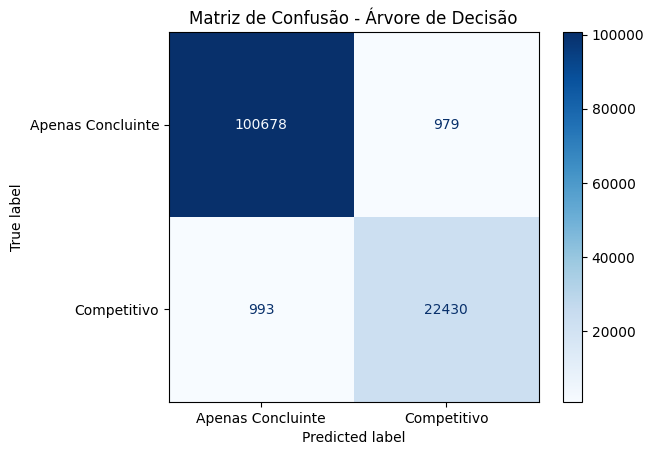


Resultados para KNN:
                   precision    recall  f1-score   support

Apenas Concluinte       0.99      0.99      0.99    101657
      Competitivo       0.97      0.97      0.97     23423

         accuracy                           0.99    125080
        macro avg       0.98      0.98      0.98    125080
     weighted avg       0.99      0.99      0.99    125080

Acurácia: 0.9873121202430445


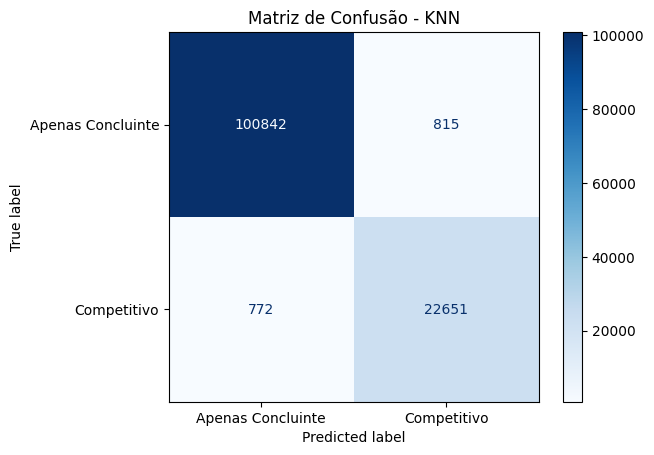


Resultados para Random Forest:
                   precision    recall  f1-score   support

Apenas Concluinte       0.99      0.99      0.99    101657
      Competitivo       0.97      0.97      0.97     23423

         accuracy                           0.99    125080
        macro avg       0.98      0.98      0.98    125080
     weighted avg       0.99      0.99      0.99    125080

Acurácia: 0.9878877518388232


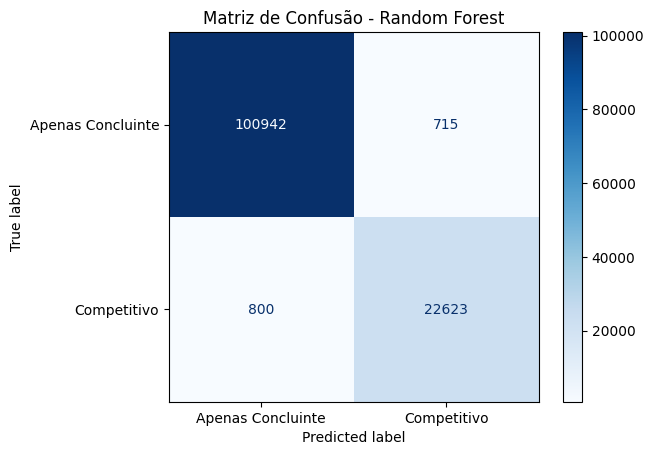


Resultados para XGBoost:
                   precision    recall  f1-score   support

Apenas Concluinte       0.99      0.99      0.99    101657
      Competitivo       0.97      0.97      0.97     23423

         accuracy                           0.99    125080
        macro avg       0.98      0.98      0.98    125080
     weighted avg       0.99      0.99      0.99    125080

Acurácia: 0.9887352094659418


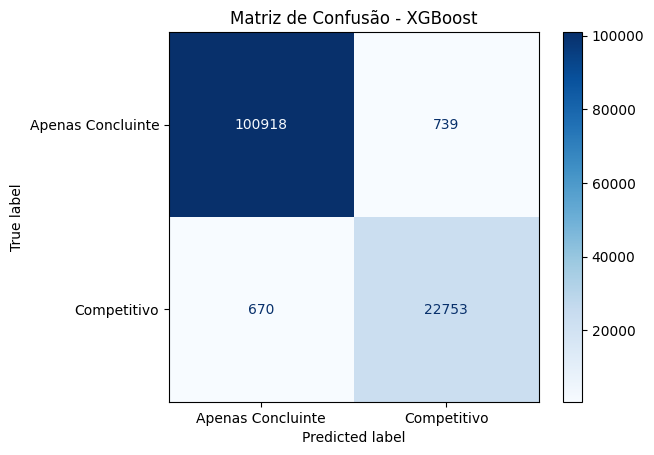

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "Árvore de Decisão": clf_tree,
    "KNN": knn,
    "Random Forest": rf,
    "XGBoost": xgb_clf
}

for nome, modelo in modelos.items():
    print(f"\nResultados para {nome}:")
    y_pred = modelo.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['Apenas Concluinte', 'Competitivo']))
    print('Acurácia:', accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Apenas Concluinte', 'Competitivo'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()

In [26]:
# Obter predições e probabilidades de cada modelo
y_pred_tree = clf_tree.predict(X_test)
y_pred_knn  = knn.predict(X_test)
y_pred_rf   = rf.predict(X_test)
y_pred_xgb  = xgb_clf.predict(X_test)

proba_tree = clf_tree.predict_proba(X_test)
proba_knn  = knn.predict_proba(X_test)
proba_rf   = rf.predict_proba(X_test)
proba_xgb  = xgb_clf.predict_proba(X_test)

from scipy.stats import mode

# Empilhar as predições
committee_preds = np.vstack([y_pred_tree, y_pred_knn, y_pred_rf, y_pred_xgb]).T

# Para cada amostra, pega o valor mais comum (maioria)
y_pred_hard = mode(committee_preds, axis=1).mode.flatten()

In [27]:
# Média das probabilidades
committee_proba = (proba_tree + proba_knn + proba_rf + proba_xgb) / 4

# Para cada linha, pega a classe com maior probabilidade média
y_pred_soft = np.argmax(committee_proba, axis=1)


Métricas para Comitê Hard Voting
                   precision    recall  f1-score   support

Apenas Concluinte       0.99      0.99      0.99    101657
      Competitivo       0.97      0.96      0.97     23423

         accuracy                           0.99    125080
        macro avg       0.98      0.98      0.98    125080
     weighted avg       0.99      0.99      0.99    125080

Acurácia: 0.9881196034537896


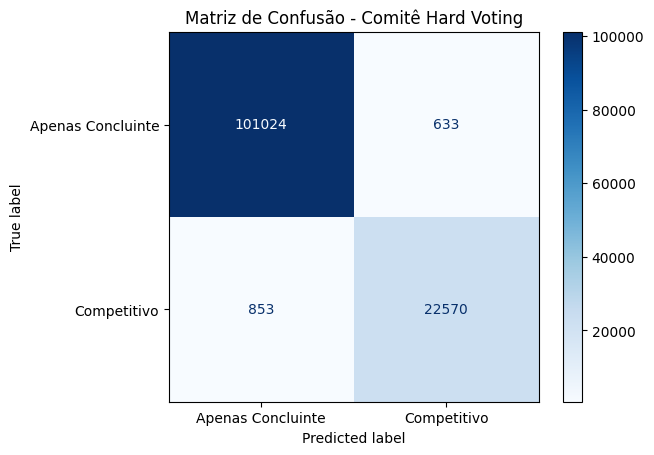


Métricas para Comitê Soft Voting
                   precision    recall  f1-score   support

Apenas Concluinte       0.99      0.99      0.99    101657
      Competitivo       0.97      0.97      0.97     23423

         accuracy                           0.99    125080
        macro avg       0.98      0.98      0.98    125080
     weighted avg       0.99      0.99      0.99    125080

Acurácia: 0.9879597057882955


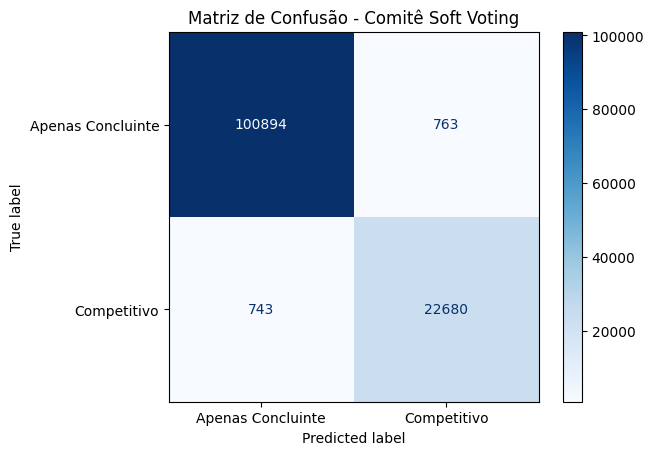

In [28]:
def avaliar_comite(y_true, y_pred, nome):
    print(f"\nMétricas para {nome}")
    print(classification_report(y_true, y_pred, target_names=['Apenas Concluinte', 'Competitivo']))
    print('Acurácia:', accuracy_score(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Apenas Concluinte', 'Competitivo'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()

avaliar_comite(y_test, y_pred_hard, "Comitê Hard Voting")
avaliar_comite(y_test, y_pred_soft, "Comitê Soft Voting")